<a href="https://colab.research.google.com/github/josefa-santana/topicosEspeciaisII/blob/main/regressaoLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

planetas=sns.load_dataset('planets')

In [162]:
planetas.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [163]:
planetas = planetas.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


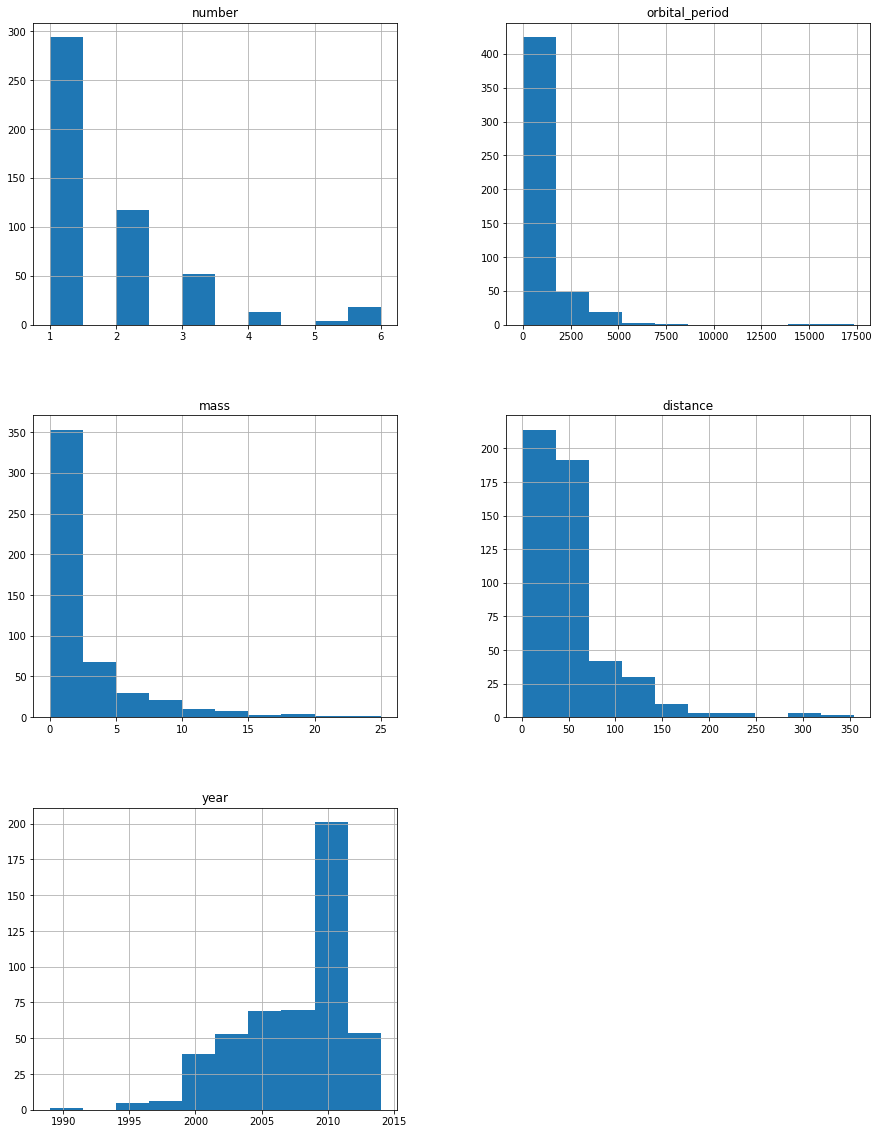

In [164]:
fig = plt.figure(figsize= (15, 20))
ax = fig.gca()
planetas.hist(ax=ax);

In [165]:
correlacao = planetas.corr()

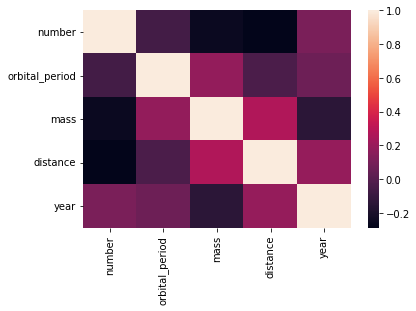

In [166]:
sns.heatmap(correlacao)

In [167]:
from sklearn.preprocessing import LabelEncoder

In [168]:
le = LabelEncoder()

In [169]:
le.fit(planetas['method'])
list(le.classes_)

['Radial Velocity', 'Transit']

In [170]:
planetas['method'] = le.transform(planetas['method'])

In [171]:
planetas

,method,number,orbital_period,mass,distance,year
0,0,1,269.30000,7.100,77.40,2006
1,0,1,874.77400,2.210,56.95,2008
2,0,1,763.00000,2.600,19.84,2011
3,0,1,326.03000,19.400,110.62,2007
4,0,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,0,1,111.70000,2.100,14.90,2009
641,0,1,5.05050,1.068,44.46,2013
642,0,1,311.28800,1.940,17.24,1999
649,1,1,2.70339,1.470,178.00,2013


In [172]:
X = planetas.drop('method', axis=1).values
y = planetas['method'].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3,
random_state=1)


In [174]:
from sklearn.linear_model import LogisticRegression


In [175]:
modelo = LogisticRegression()
modelo.fit(X_train,y_train)

LogisticRegression()

In [176]:
Y_previsto = modelo.predict(X_test)

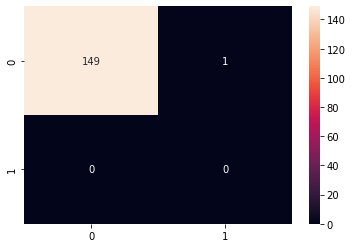

In [177]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,Y_previsto)
cm
sns.heatmap(cm,annot=True, fmt="d")

In [178]:
from sklearn.metrics import classification_report,f1_score,precision_score,average_precision_score,recall_score,accuracy_score

In [179]:
cr = classification_report(y_test,Y_previsto,labels=[0,1])
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       0.00      0.00      0.00         0

    accuracy                           0.99       150
   macro avg       0.50      0.50      0.50       150
weighted avg       1.00      0.99      1.00       150



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [180]:
f1 = f1_score(y_test,Y_previsto)
print("F1 score = {:0.2f}%".format(f1*100))

precisao = precision_score(y_test,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

F1 score = 0.00%
Precision score = 0.00%


In [181]:
precisao = precision_score(y_test,Y_previsto)
print("Precision score = {:0.2f}%".format(precisao*100))

Precision score = 0.00%


In [182]:
avg_precision = average_precision_score(y_test,Y_previsto)
print("Averaged Precision score = {:0.2f}%".format(avg_precision*100))

Averaged Precision score = nan%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:864: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


In [183]:
rec = recall_score(y_test,Y_previsto)
print("Recall score = {:0.2f}%".format(rec*100))

Recall score = 0.00%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [184]:
acc = accuracy_score(y_test,Y_previsto)
print("Accuracy score = {:0.2f}%".format(acc*100))

Accuracy score = 99.33%


https://senolomer0.medium.com/seaborn-datasetss-explorations-39d080e55e55